In [1]:
%matplotlib inline


# Errorbar function


This exhibits the most basic use of the error bar method.
In this case, constant values are provided for the error
in both the x- and y-directions.


Layer  0 : Data rate:  780 ± 23
Layer  1 : Data rate:  655 ± 43
Layer  2 : Data rate:  543 ± 12
Layer  3 : Data rate:  430 ± 29
Layer  4 : Data rate:  422 ± 41
Layer  5 : Data rate:  643 ± 38
Layer  6 : Data rate:  648 ± 31
{0: 780.0, 1: 655.0, 2: 543.0, 3: 430.0, 4: 422.0, 5: 643.0, 6: 648.0}
{0: 23.0, 1: 43.0, 2: 12.0, 3: 29.0, 4: 41.0, 5: 38.0, 6: 31.0}


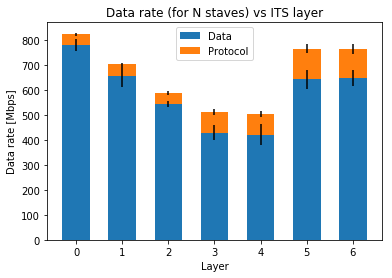

In [8]:
import numpy as np
import csv
import matplotlib.pyplot as plt


dict_data_mean = dict()
dict_data_stddev = dict()
dict_protocol_mean = dict()
dict_protocol_stddev = dict()
    
with open('/home/simon/Code/SystemC/alpide_submodule/submodule_alpide_systemc/software/alpide_dataflow_sim/sim_output_pixhit-new2/data_rates.csv') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=';')
    for row in csv_reader:
        print('Layer ', row['layer'], ': Data rate: ', row['data_mbps_mean'], '±', row['data_mbps_stddev'])
        #data_rate_mbps_mean[]
        layer = int(row['layer'])
        dict_data_mean[layer] = float(row['data_mbps_mean'])
        dict_data_stddev[layer] = float(row['data_mbps_stddev'])
        dict_protocol_mean[layer] = float(row['protocol_mbps_mean'])
        dict_protocol_stddev[layer] = float(row['protocol_mbps_stddev'])

    print(dict_data_mean)
    print(dict_data_stddev)
    
list_data_mean = sorted(dict_data_mean.items())
list_data_stddev = sorted(dict_data_stddev.items())
list_protocol_mean = sorted(dict_protocol_mean.items())
list_protocol_stddev = sorted(dict_protocol_stddev.items())


layer, data_mean = zip(*list_data_mean)
layer, data_stddev = zip(*list_data_stddev)
layer, protocol_mean = zip(*list_protocol_mean)
layer, protocol_stddev = zip(*list_protocol_stddev)



# example data
#x = np.arange(0.1, 4, 0.5)
#y = np.exp(-x)

fig, ax = plt.subplots()
#ax.errorbar(x, y, xerr=0.2, yerr=0.4)
#ax.errorbar(layer, data_mean, yerr=data_stddev)
#ax.errorbar(layer, protocol_mean, yerr=protocol_stddev)
#plt.show()

width = 0.6       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(layer, data_mean, width, yerr=data_stddev, label='Data')
p2 = plt.bar(layer, protocol_mean, width, bottom=data_mean, yerr=protocol_stddev, label='Protocol')

plt.title('Data rate (for N staves) vs ITS layer')
plt.xlabel('Layer')
plt.ylabel('Data rate [Mbps]')
plt.legend()


plt.show()